## Exploratory data analysis and feature engineering

In [1]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
import string
string.punctuation
import nltk
import re
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
import sklearn.utils
# from collections import counter
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/houze/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/houze/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/houze/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/houze/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/houze/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob

extract data of business analyst and data scientist with remote location

In [3]:
df = pd.read_csv('webscraping_results_assignment3.csv')

In [4]:
df.head()

,Unnamed: 0,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,0,Business Analyst,NextGen Global Resources,"Remote in Bedford, NH",4.0,PostedJust posted,$20 - $26 an hour,Remote within the NED Footprint (EST Time Zone...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Description:\nClient: Comcast\nJob Location\nR...
1,1,"Senior Manager, Digital Process Automation Bus...",Takeda Pharmaceutical,"Remote in Boston, MA 02112",3.7,PostedPosted 3 days ago,"$130,200 - $186,000 a year",Foundational experience playing a contributing...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"By clicking the “Apply” button, I understand t..."
2,2,TECHNICAL OPERATIONS ANALYST (NIGHT SHIFT),XR Trading LLC,+2 locationsRemote,4.2,PostedPosted 30+ days ago,NaN,The successful candidate will bring a passion ...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,XR Trading is a proprietary trading firm with ...
3,3,Business Analyst,Digipath Infotech,Remote,NaN,PostedPosted 2 days ago,"$85,000 - $95,000 a year",Interface with business stakeholders to unders...,https://www.indeed.com/company/Digipath-Infote...,Position : Business Analyst\nDuration : 1 Yr +...
4,4,Business Analyst,Tata Technologies Inc.,"Remote in Dallas, TX",3.7,PostedPosted 3 days ago,$90 - $100 an hour,This is a business analysis position in the Re...,https://www.indeed.com/rc/clk?jk=90e0042e7e37f...,Title : Business Analyst\nLocation : Remote in...


In [5]:
# The number of distinctive job postings
print('The number of job postings of remote business analyst and data scientist is', df.shape[0])

The number of job postings of remote business analyst and data scientist is 1088


In [6]:
df_job = df.copy()

In [7]:
def text_processing(df, column):
    # Punctuation Removal
    df[column] = df[column].apply(lambda x: "".join(i for i in x if i not in string.punctuation))
    # Lowering the text
    df[column] = df[column].apply(lambda x: x.lower())
    # replace \n with an empty space
    df[column] = df[column].str.replace("\n", " ")
    # Tokenization
    df[column] = df[column].apply(lambda x: re.split('W+', x))
    # Stop word removal
    stopwords = nltk.corpus.stopwords.words('english')
    df[column] = df[column].apply(lambda x:"".join(i for i in x if i not in stopwords))
    # Lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()
    df[column] = df[column].apply(lambda x:"".join([wordnet_lemmatizer.lemmatize(word) for word in x]))
    return df

In [8]:
# text processing the descriptions, title, company, location
df_skills1 = text_processing(df_job, 'Descriptions')
df_title = text_processing(df_job, 'Title')
df_company = text_processing(df_job, 'Company')
df_location = text_processing(df_job, 'Location')

In [9]:
df_skills1.head()

,Unnamed: 0,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,0,business analyst,nextgen global resources,remote in bedford nh,4.0,PostedJust posted,$20 - $26 an hour,Remote within the NED Footprint (EST Time Zone...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,description client comcast job location remote...
1,1,senior manager digital process automation busi...,takeda pharmaceutical,remote in boston ma 02112,3.7,PostedPosted 3 days ago,"$130,200 - $186,000 a year",Foundational experience playing a contributing...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,by clicking the “apply” button i understand th...
2,2,technical operations analyst night shift,xr trading llc,2 locationsremote,4.2,PostedPosted 30+ days ago,NaN,The successful candidate will bring a passion ...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,xr trading is a proprietary trading firm with ...
3,3,business analyst,digipath infotech,remote,NaN,PostedPosted 2 days ago,"$85,000 - $95,000 a year",Interface with business stakeholders to unders...,https://www.indeed.com/company/Digipath-Infote...,position business analyst duration 1 yr int...
4,4,business analyst,tata technologies inc,remote in dallas tx,3.7,PostedPosted 3 days ago,$90 - $100 an hour,This is a business analysis position in the Re...,https://www.indeed.com/rc/clk?jk=90e0042e7e37f...,title business analyst location remote in us...


Extract data for technical/hard skills, business/soft skills, position title, company, and any other relevant information from job postings texts.

In [10]:
# mannually extract technical and soft skills
technical_skills = ['python', 'model', 'ml', 'c','r', 'regression', 'c++','java','mining', 'visualization', 'web', 'hadoop','scala','flask','pandas','spark','scikit-learn', 'npm'
                    'numpy','php','mysql','css','mongdb','nltk','statistical', 'math', 'engineering', 'database', 'fastai' , 'keras', 'pytorch','tensorflow', 'networks'
                   'linux','ruby', 'javascript', 'ai','react','reactjs', 'ux', 'adobe', 'sas', 'ui','tableau', 'excel', 'perl', 'neural', 'power', 'swift', 'formulation']
soft_skills = ['creativity', 'listening', 'empathy', 'confidence', 'respect', 'professionalism', 'mentoring', 'networking', 'leadership', 'communication', 'empathy', 'professionalism', 'observation', 'critical',
               'organization', 'speaking', 'distilling', 'presenting', 'design thinking', 'collaboration', 'management', ]

In [11]:
# create empty technical skills dataframe 
df_skills = df_skills1.copy()
for skill in technical_skills:
    df_skills[skill] = 0

In [12]:
# create empty soft skills dataframe
for skill in soft_skills:
    df_skills[skill] = 0

In [14]:
# extract technical skills and append technical skills to the dataframe
for i in range(len(df)):
    for j in range(len(technical_skills)):
        if technical_skills[j] in df_skills.Descriptions[i]:
            df_skills[technical_skills[j]][i] = 1
        else:
            df_skills[technical_skills[j]][i] = 0

In [15]:
# extract soft skills and append soft skills to the dataframe
for i in range(len(df_skills)):
    for j in range(len(soft_skills)):
        if soft_skills[j] in df_skills.Descriptions[i]:
            df_skills[soft_skills[j]][i] = 1
        else:
            df_skills[soft_skills[j]][i] = 0

In [16]:
# extract position title
corpus_title = df_skills1.Title
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_title)
title_dic = {'word': vectorizer.get_feature_names(),
        'tfidf': X.toarray().sum(axis=0).tolist()}
extract_title = pd.DataFrame(title_dic)
extract_title = extract_title.sort_values(by="tfidf", ascending=False) 

In [17]:
# top 10 words in job titles
extract_title.head(10)

,word,tfidf
40,analyst,205.975663
99,business,200.322293
147,data,169.206363
454,scientist,154.676679
463,senior,63.733044
422,remote,61.698380
481,sr,32.138962
496,systems,31.717235
175,engineer,27.682760
360,operations,26.399157


In [18]:
# extract company
corpus_company = df_company.Company
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_company)
company_dic = {'word': vectorizer.get_feature_names(),
        'tfidf': X.toarray().sum(axis=0).tolist()}
extract_company = pd.DataFrame(company_dic)
extract_company = extract_company.sort_values(by="tfidf", ascending=False) 

In [19]:
# top 10 words in company
extract_company.head(10)

,word,tfidf
508,inc,41.042331
618,llc,26.941009
965,solutions,26.487524
436,global,23.970133
1038,technologies,22.045933
453,group,21.364971
524,insight,19.835771
471,health,14.788440
253,consulting,12.516323
1013,systems,10.704977


In [20]:
# extract location (any other relevant locations)
corpus_location = df_skills1.Location
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_location)
extract_dic = {'word': vectorizer.get_feature_names(),
        'tfidf': X.toarray().sum(axis=0).tolist()}
extract_location = pd.DataFrame(extract_dic)
extract_location = extract_location.sort_values(by="tfidf", ascending=False) 

In [21]:
# top 10 words in location
extract_location.head(10)

,word,tfidf
327,remote,675.542488
231,in,74.627438
244,locationremote,70.000000
355,tx,26.821228
246,locationsremote,26.605768
161,ca,19.714046
223,houston,17.037895
243,location,17.025642
94,77008,15.746162
375,york,15.529935


organize data into logically formatted data structure for clustering analysis

In [22]:
# drop columns that are not important
df_skills1 = df_skills.copy()
df_skills1 = df_skills1.drop(['Rating', 'Date', 'Salary', 'Description', 'Links', 'Descriptions'], axis=1)

In [23]:
df_skills1.head(10)

,Unnamed: 0,Title,Company,Location,python,model,ml,c,r,regression,...,communication,observation,critical,organization,speaking,distilling,presenting,design thinking,collaboration,management
0,0,business analyst,nextgen global resources,remote in bedford nh,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,senior manager digital process automation busi...,takeda pharmaceutical,remote in boston ma 02112,0,1,1,1,1,0,...,1,0,1,0,0,0,0,1,0,1
2,2,technical operations analyst night shift,xr trading llc,2 locationsremote,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,1
3,3,business analyst,digipath infotech,remote,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,4,business analyst,tata technologies inc,remote in dallas tx,0,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
5,5,business analyst,agreeya solutions,remote,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,6,business analyst,sambasafety,1 locationremote,0,0,0,1,1,0,...,1,0,0,1,0,0,1,0,0,0
7,7,it business analyst,khoj information technology inc,remote,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
8,8,business system analyst,input 1,1 locationremote,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
9,9,business analyst,american unit inc,remote in austin tx 78701,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0


feature engineer for clustering analysis

In [24]:
# feature engineering job title 
engineer = []
hi = []
title = df_title.Title.tolist()
for i in title:
    if ('engineer' in i) or ('data' in i) or ('machine learning' in i):
        engineer.append('Data Scientist')
#     elif 'data' in i:
#         engineer.append('Data Scientist')
    elif 'operation' in i:
        engineer.append('Operation Analyst')
#     elif 'machine learning' in i:
#         engineer.append('Data S')
    else:
        engineer.append('Business Analyst')
df_skills1['Title'] = engineer

In [25]:
# feature engineering job locations
location1 = []
for i in range((len(df_skills.Location))):
    if len(df_location.Location[i].split()) >= 3:
        location1.append(df_location.Location[i].split()[2])
    else:
        location1.append('remote')
df_skills1['Location'] = location1

In [26]:
df_skills1.head(10)

,Unnamed: 0,Title,Company,Location,python,model,ml,c,r,regression,...,communication,observation,critical,organization,speaking,distilling,presenting,design thinking,collaboration,management
0,0,Business Analyst,nextgen global resources,bedford,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Business Analyst,takeda pharmaceutical,boston,0,1,1,1,1,0,...,1,0,1,0,0,0,0,1,0,1
2,2,Operation Analyst,xr trading llc,remote,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,1
3,3,Business Analyst,digipath infotech,remote,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,4,Business Analyst,tata technologies inc,dallas,0,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
5,5,Business Analyst,agreeya solutions,remote,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,6,Business Analyst,sambasafety,remote,0,0,0,1,1,0,...,1,0,0,1,0,0,1,0,0,0
7,7,Business Analyst,khoj information technology inc,remote,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
8,8,Business Analyst,input 1,remote,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
9,9,Business Analyst,american unit inc,austin,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0


Visualize key information

https://www.kaggle.com/code/sanabdriss/nlp-extract-skills-from-job-descriptions

wordcloud of companies and loctaion

(-0.5, 399.5, 199.5, -0.5)

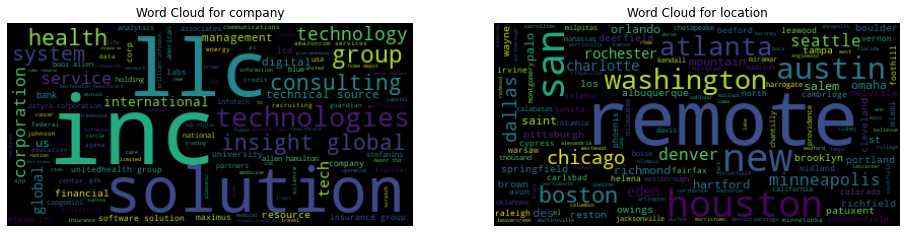

In [27]:
company = " ".join(df_skills1['Company'].tolist())
wordcloud_company = WordCloud().generate(company)
location = " ".join(df_skills1['Location'].tolist())
wordcloud_location = WordCloud().generate(location)
plt.figure(figsize=(16, 7))
plt.subplot(1,2,1)
plt.imshow(wordcloud_company, interpolation='bilinear')
plt.title('Word Cloud for company')
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(wordcloud_location, interpolation='bilinear')
plt.title('Word Cloud for location')
plt.axis("off")

wordcloud all skills vs. job titles

In [28]:
skills_business = []
skills_operation = []
skills_data = []

for i in range(len((df_skills1[df_skills1.Title == 'Business Analyst']))):
    for j in technical_skills + soft_skills:
        if df_skills1[df_skills1.Title == 'Business Analyst'].iloc[i][j] == 1:
            skills_business.append(j)  
for i in range(len((df_skills1[df_skills1.Title == 'Operation Analyst']))):
    for j in technical_skills + soft_skills:
        if df_skills1[df_skills1.Title == 'Operation Analyst'].iloc[i][j] == 1:
            skills_operation.append(j)  
for i in range(len((df_skills1[df_skills1.Title == 'Data Scientist']))):
    for j in technical_skills + soft_skills:
        if df_skills1[df_skills1.Title == 'Data Scientist'].iloc[i][j] == 1:
            skills_data.append(j)  


*** Business Analyst ***



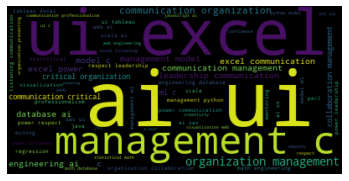


*** Operation Analyst ***



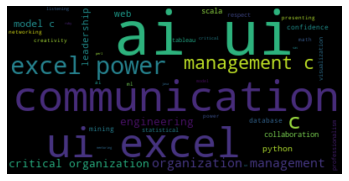


*** Data Scientist ***



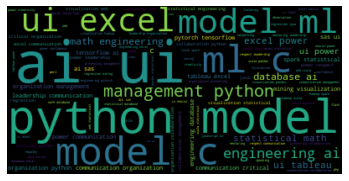

In [29]:
text1 = " ".join(skills_business)
# Create and generate a word cloud image:
print("\n***",'Business Analyst',"***\n")
wordcloud1 = WordCloud().generate(text1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()
# Display the generated image:
text2 = " ".join(skills_operation)
# Create and generate a word cloud image:
wordcloud2 = WordCloud().generate(text2)
print("\n***",'Operation Analyst',"***\n")
# Display the generated image:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
text3 = " ".join(skills_data)
# Create and generate a word cloud image:
wordcloud3 = WordCloud().generate(text3)
print("\n***",'Data Scientist',"***\n")
# Display the generated image:
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud softskills vs jobtitles

In [30]:
skills_business = []
skills_operation = []
skills_data = []

for i in range(len((df_skills1[df_skills1.Title == 'Business Analyst']))):
    for j in soft_skills:
        if df_skills1[df_skills1.Title == 'Business Analyst'].iloc[i][j] == 1:
            skills_business.append(j)  
for i in range(len((df_skills1[df_skills1.Title == 'Operation Analyst']))):
    for j in soft_skills:
        if df_skills1[df_skills1.Title == 'Operation Analyst'].iloc[i][j] == 1:
            skills_operation.append(j)  
for i in range(len((df_skills1[df_skills1.Title == 'Data Scientist']))):
    for j in soft_skills:
        if df_skills1[df_skills1.Title == 'Data Scientist'].iloc[i][j] == 1:
            skills_data.append(j)  


*** Business Analyst ***



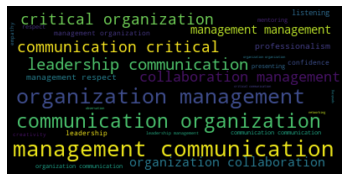


*** Operation Analyst ***



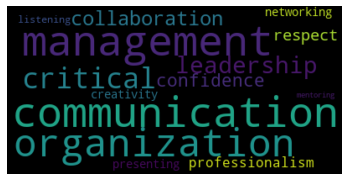


*** Data Scientist ***



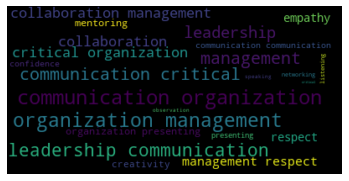

In [31]:
text1 = " ".join(skills_business)
# Create and generate a word cloud image:
print("\n***",'Business Analyst',"***\n")
wordcloud1 = WordCloud().generate(text1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()
# Display the generated image:
text2 = " ".join(skills_operation)
# Create and generate a word cloud image:
wordcloud2 = WordCloud().generate(text2)
print("\n***",'Operation Analyst',"***\n")
# Display the generated image:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
text3 = " ".join(skills_data)
# Create and generate a word cloud image:
wordcloud3 = WordCloud().generate(text3)
print("\n***",'Data Scientist',"***\n")
# Display the generated image:
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

## Hierarchical clustering implementation

In [36]:
df_new = df_skills1.iloc[:, 4:]
labels = df_new.T.index.tolist()

In [37]:
# create diagnoal 69*69 matrices and sum together 1088 rows
from scipy.spatial.distance import euclidean
D = np.zeros([df_new.shape[1],df_new.shape[1]])
for m in range(df_new.shape[0]):
    for i in range(df_new.shape[1]):
        for j in range(df_new.shape[1]):
            D[i,j] = euclidean(df_new.iloc[m][i],df_new.iloc[m][j]) + D[i,j]

In [38]:
# Normalize diagonal promixity matrix
D = (D - D.min())/(D.max() - D.min())

In [39]:
D

array([[0.        , 0.26378676, 0.32352941, ..., 0.36948529, 0.39522059,
        0.66911765],
       [0.26378676, 0.        , 0.37408088, ..., 0.47886029, 0.46783088,
        0.57996324],
       [0.32352941, 0.37408088, 0.        , ..., 0.24816176, 0.32352941,
        0.59926471],
       ...,
       [0.36948529, 0.47886029, 0.24816176, ..., 0.        , 0.15808824,
        0.58639706],
       [0.39522059, 0.46783088, 0.32352941, ..., 0.15808824, 0.        ,
        0.54595588],
       [0.66911765, 0.57996324, 0.59926471, ..., 0.58639706, 0.54595588,
        0.        ]])

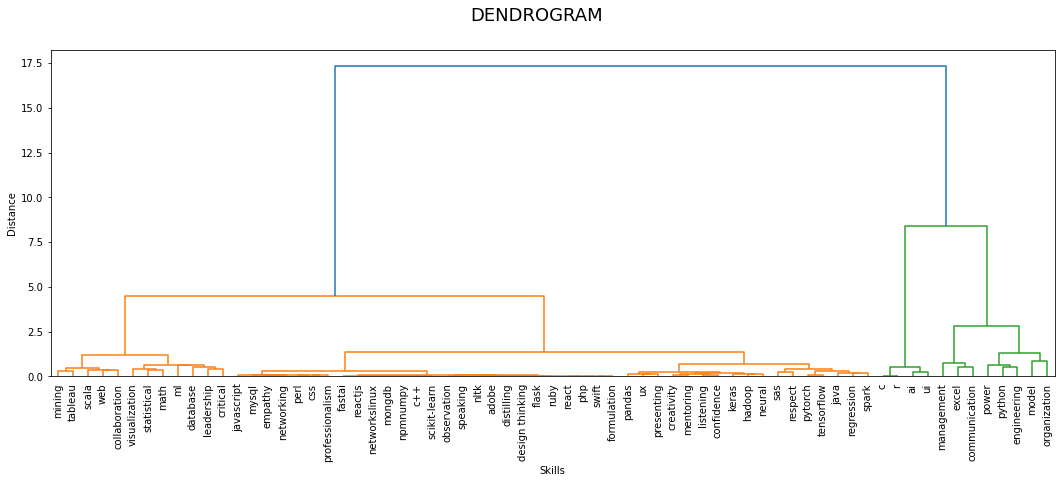

In [40]:
# generate and plot a dendrogram from hierarchical clustering algorithm
distance = linkage(D, method='ward', metric='euclidean')
plt.figure(figsize=(18,6))
dendrogram(distance, labels = labels, leaf_rotation=90., leaf_font_size=10.,)
plt.xlabel('Skills')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM",fontsize=18)
plt.show()

In [41]:
# Get clustering results and append to a dataframe
from scipy.cluster.hierarchy import fcluster
labels1 = fcluster(distance, 1.05, 'distance')

In [42]:
labels1

array([7, 8, 2, 5, 5, 4, 3, 4, 1, 2, 1, 4, 1, 3, 4, 4, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 7, 2, 3, 4, 4, 4, 3, 3, 3, 5, 3, 3, 4, 3, 4, 5, 1, 6, 3,
       4, 7, 3, 3, 4, 4, 3, 4, 4, 3, 4, 3, 2, 6, 3, 2, 8, 3, 3, 4, 3, 1,
       6], dtype=int32)

In [43]:
hierarchical= df_skills1.iloc[:, 3:]
hierarchical_skills = hierarchical.T

In [44]:
hierarchical_skills = pd.DataFrame({'labels': labels})

In [45]:
hierarchical_skills['hier_cluster'] = labels1
hierarchical_skills.sort_values(by = 'hier_cluster', ascending = True)
df_hier = pd.DataFrame(hierarchical_skills['hier_cluster'])
df_hier

,hier_cluster
0,7
1,8
2,2
3,5
4,5
...,...
62,3
63,4
64,3
65,1


In [46]:
label_array = np.array(df_hier['hier_cluster'].tolist())

In [47]:
course = ['Data Management', 'Leadership and Organizations', 'Data Analytics in Information', 'Presentation and Networking', 'Information Data Mining', 'Big Data Analytics','Machine Learning and Visualizations','Database Analytics', 'Engineering Leadership']

In [48]:
# design courses
for i in range(9):
    print(course[i], 'covers', hierarchical_skills.index[np.where(label_array == i+1)])

Data Management covers Int64Index([8, 10, 12, 41, 65], dtype='int64')
Leadership and Organizations covers Int64Index([2, 9, 23, 24, 26, 56, 59], dtype='int64')
Data Analytics in Information covers Int64Index([ 6, 13, 16, 17, 18, 19, 20, 21, 22, 27, 31, 32, 33, 35, 36, 38, 43,
            46, 47, 50, 53, 55, 58, 61, 62, 64],
           dtype='int64')
Presentation and Networking covers Int64Index([5, 7, 11, 14, 15, 28, 29, 30, 37, 39, 44, 48, 49, 51, 52, 54, 63], dtype='int64')
Information Data Mining covers Int64Index([3, 4, 34, 40], dtype='int64')
Big Data Analytics covers Int64Index([42, 57, 66], dtype='int64')
Machine Learning and Visualizations covers Int64Index([0, 25, 45], dtype='int64')
Database Analytics covers Int64Index([1, 60], dtype='int64')
Engineering Leadership covers Int64Index([], dtype='int64')


In [49]:
# redesign
for i in range(len(label_array)):
    if i in [64, 62, 61,  58, 55, 53]:
        label_array[i] = 4
    elif i in [13, 14, 15, 16, 17, 18, 19]:
        label_array[i] = 1
    elif i in [22, 27, 28, 29, 30, 31]:
        label_array[i] = 8
    elif i in [60, 66,  57]:
        label_array[i] = 2
for i in range(9):
    print(course[i], 'covers', hierarchical_skills.index[np.where(label_array == i+1)])

Data Management covers Int64Index([8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 41, 65], dtype='int64')
Leadership and Organizations covers Int64Index([2, 9, 23, 24, 26, 56, 57, 59, 60, 66], dtype='int64')
Data Analytics in Information covers Int64Index([6, 20, 21, 32, 33, 35, 36, 38, 43, 46, 47, 50], dtype='int64')
Presentation and Networking covers Int64Index([5, 7, 11, 37, 39, 44, 48, 49, 51, 52, 53, 54, 55, 58, 61, 62, 63,
            64],
           dtype='int64')
Information Data Mining covers Int64Index([3, 4, 34, 40], dtype='int64')
Big Data Analytics covers Int64Index([42], dtype='int64')
Machine Learning and Visualizations covers Int64Index([0, 25, 45], dtype='int64')
Database Analytics covers Int64Index([1, 22, 27, 28, 29, 30, 31], dtype='int64')
Engineering Leadership covers Int64Index([], dtype='int64')


## K-means or DBSCAN clustering implementation

### https://predictivehacks.com/k-means-elbow-method-code-for-python/

In [50]:
# get skills dataframe
skills_new = df_new.T

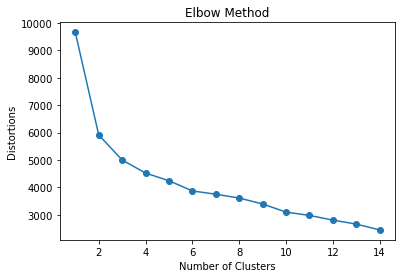

In [51]:
# elbow method to check the optimal number of clusters
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 1624)
    kmeanModel.fit(skills_new)
    distortions.append(kmeanModel.inertia_)

plt.plot(range(1,15), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortions')
plt.show()

In [52]:
# set clusters equal to 8
model = KMeans(8, random_state = 1624)

https://www.askpython.com/python/examples/plot-k-means-clusters-python

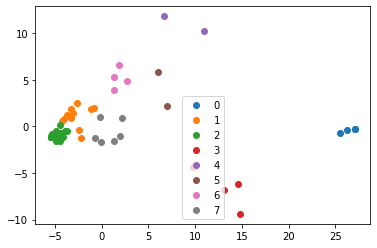

In [53]:
# plot scatter plot of the 8 clusters
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(2)

df_reduced = pca.fit_transform(skills_new)
label_kmeans = model.fit_predict(df_reduced)
labels2 = np.unique(label_kmeans)

for i in labels2:
    plt.scatter(df_reduced[label_kmeans == i , 0] , df_reduced[label_kmeans == i , 1] , label = i)
plt.legend()
plt.show()

In [54]:
course_kmeans = ['C Programming in Information Study', 'Data Analytics in Management', 'Data Mining', 'Model Application', 'Innovation Study', 'Data Structure', 'Project Management', 'Management Study']

In [55]:
# design courses
for i in range(8):
    print(course_kmeans[i], 'covers', skills_new.index[np.where(label_kmeans==i)])

C Programming in Information Study covers Index(['c', 'r', 'ai', 'ui'], dtype='object')
Data Analytics in Management covers Index(['regression', 'java', 'mining', 'hadoop', 'pandas', 'spark', 'pytorch',
       'tensorflow', 'sas', 'tableau', 'neural', 'respect'],
      dtype='object')
Data Mining covers Index(['c++', 'flask', 'scikit-learn', 'npmnumpy', 'php', 'mysql', 'css',
       'mongdb', 'nltk', 'fastai', 'keras', 'networkslinux', 'ruby',
       'javascript', 'react', 'reactjs', 'ux', 'adobe', 'perl', 'swift',
       'formulation', 'creativity', 'listening', 'empathy', 'confidence',
       'professionalism', 'mentoring', 'networking', 'observation', 'speaking',
       'distilling', 'presenting', 'design thinking'],
      dtype='object')
Model Application covers Index(['excel', 'communication', 'organization', 'management'], dtype='object')
Innovation Study covers Index(['python', 'model'], dtype='object')
Data Structure covers Index(['engineering', 'power'], dtype='object')
Projec

In [56]:
# redesign courses
for i in range(len(label_kmeans)):
    if i in [5, 7, 11, 17, 19, 20, 32, 44]:
        label_kmeans[i] = 2
    elif i in [52,53,54, 57,60, 61, 62, 63]:
        label_kmeans[i] = 7
    elif i in [13, 14, 15, 16, 17, 18, 35]:
        label_kmeans[i] = 5
    elif i in [28, 29, 30]:
        label_kmeans[i] = 3
    elif i in [64, 58, 55]:
        label_kmeans[i] = 4
    elif i in [36, 37, 48]:
        label_kmeans[i] = 0


for i in range(8):
    print(course_kmeans[i], 'covers', skills_new.index[np.where(label_kmeans==i)])

C Programming in Information Study covers Index(['c', 'r', 'ai', 'reactjs', 'ux', 'ui', 'creativity'], dtype='object')
Data Analytics in Management covers Index(['mining', 'sas', 'tableau'], dtype='object')
Data Mining covers Index(['regression', 'c++', 'java', 'hadoop', 'npmnumpy', 'mysql', 'css',
       'mongdb', 'nltk', 'fastai', 'networkslinux', 'ruby', 'javascript',
       'adobe', 'perl', 'neural', 'swift', 'formulation', 'listening',
       'empathy', 'confidence'],
      dtype='object')
Model Application covers Index(['keras', 'pytorch', 'tensorflow', 'excel', 'management'], dtype='object')
Innovation Study covers Index(['python', 'model', 'networking', 'observation', 'design thinking'], dtype='object')
Data Structure covers Index(['flask', 'pandas', 'spark', 'scikit-learn', 'php', 'engineering',
       'react', 'power'],
      dtype='object')
Project Management covers Index(['ml', 'visualization', 'statistical', 'math'], dtype='object')
Management Study covers Index(['web', 's

## Interpretation of results, discussion and final course curriculum

Please refer visualization plots in the report